Decision tree

In [4]:
import sklearn 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
from sklearn.datasets import load_boston

In [7]:
boston_data=load_boston()

In [8]:
df=pd.DataFrame(boston_data.data,columns=boston_data.feature_names)

In [9]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [10]:
X=df['LSTAT'].values
Y=boston_data.target

In [11]:
from sklearn.tree import DecisionTreeRegressor

In [12]:
tree=DecisionTreeRegressor(max_depth=5)

In [13]:
tree.fit(X.reshape(-1,1),Y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=5,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [14]:
sort=X.flatten().argsort()

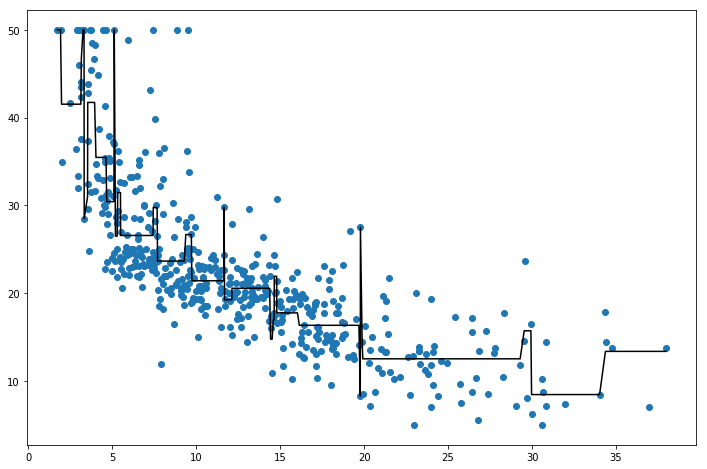

In [15]:
plt.figure(figsize=(12,8))
plt.scatter(X[sort],Y[sort])
plt.plot(X[sort],tree.predict(X[sort].reshape(-1,1)),color='k')
plt.show()

In [16]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [25]:
X=df.values

In [26]:
X

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [27]:
Y=boston_data.target

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
                                                    test_size=0.3, 
                                                    random_state=42)

In [30]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

In [31]:
forest = RandomForestRegressor(n_estimators=500, criterion='mse', 
                               random_state=42, n_jobs=-1)

In [32]:
forest.fit(X_train, Y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=-1, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [36]:
Y_train_pred = forest.predict(X_train)
Y_test_pred = forest.predict(X_test)

In [40]:
print("MSE train: {0:.4f}, test: {1:.4f}".\
      format(mean_squared_error(Y_train, Y_train_pred), 
             mean_squared_error(Y_test, Y_test_pred)))

MSE train: 4.6605, test: 13.4949


In [41]:
print("R^2 train: {0:.4f}, test: {1:.4f}".\
      format(r2_score(Y_train, Y_train_pred),
             r2_score(Y_test, Y_test_pred)))

R^2 train: 0.9470, test: 0.8189


ADABOOST

In [42]:
from sklearn.ensemble import AdaBoostRegressor
ada = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4), 
                        n_estimators=500, random_state=42)
ada.fit(X_train, Y_train)
Y_train_pred = ada.predict(X_train)
Y_test_pred = ada.predict(X_test)
print("MSE train: {0:.4f}, test: {1:.4f}".\
      format(mean_squared_error(Y_train, Y_train_pred), 
             mean_squared_error(Y_test, Y_test_pred)))
print("R^2 train: {0:.4f}, test: {1:.4f}".\
      format(r2_score(Y_train, Y_train_pred),
             r2_score(Y_test, Y_test_pred)))

MSE train: 4.6605, test: 13.4949
R^2 train: 0.9470, test: 0.8189


FEATURES SELECTION

In [47]:
ada.feature_importances_

array([0.03104826, 0.00243815, 0.01083651, 0.00085548, 0.0371141 ,
       0.23589575, 0.00958776, 0.13743614, 0.01893706, 0.02188852,
       0.04185043, 0.02193283, 0.43017901])

In [48]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [50]:
df=pd.DataFrame(ada.feature_importances_,df.columns)

In [51]:
df.columns=['feature']

In [53]:
x=df.sort_values(by='feature',ascending=True)

In [54]:
x

,feature
CHAS,0.000855
ZN,0.002438
AGE,0.009588
INDUS,0.010837
RAD,0.018937
TAX,0.021889
B,0.021933
CRIM,0.031048
NOX,0.037114
PTRATIO,0.041850


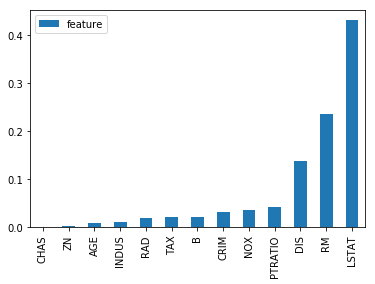

In [57]:
x.plot(kind='bar')

BY RANDOM FOREST

In [58]:
forest.feature_importances_

array([0.03213849, 0.00166784, 0.00677542, 0.00131141, 0.01508521,
       0.4038535 , 0.01414013, 0.06280815, 0.00467201, 0.0120068 ,
       0.01833147, 0.0127986 , 0.41441098])

In [65]:
from sklearn.datasets import load_boston
boston_data=load_boston()
df=pd.DataFrame(boston_data.data,columns=boston_data.feature_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [66]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [67]:
df=pd.DataFrame(forest.feature_importances_,df.columns)

In [68]:
df.columns=['feature']

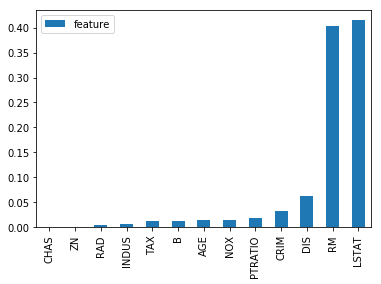

In [69]:
df.sort_values(by='feature',ascending=True).plot(kind='bar')